In [7]:
import numpy as np
import pandas as pd
from glob import glob
from decimal import Decimal
from os.path import join
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [146]:
cat_m= ['Calcium', 'Iron', 'Magnesium', 'Phosphorus', 'Potassium', 'Sodium', 'Zinc', 'Vitamin_C',
'Copper', 'Manganese', 'Selenium', 'Linoleic_Acid', 'Alpha_Linolenic_Acid']
cat_v= ['Vitamin_A', 'Vitamin_D', 'Niacin', 'Vitamin_B12', 'Vitamin_B6', 'Vitamin_B6', 'Vitamin_C', 'Vitamin_E', 'Vitamin_K', 'Iron', 'Sodium']
cat_a= ['Leucine', 'Iso_Leucine', 'Lysine', 'Methionine', 'Phenylalanine+Tyrosine', 'Threonine', 'Valine','Dietary_Fiber']

In [104]:
user_rdi={'Vitamin_B12': Decimal('2.4'), 'Calcium': Decimal('700'), 'Iron': Decimal('14'), 'Leucine': Decimal('2500'), 'Histidine': Decimal('800'), 'Phenylalanine+Tyrosine': Decimal('2900'), 'Carbohydrate': Decimal('199'), 'Magnesium': Decimal('280'), 'Selenium': Decimal('60'), 'Copper': Decimal('650'), 'Alpha_Linolenic_Acid': Decimal('1.2'), 'Threonine': Decimal('1100'), 'Linoleic_Acid': Decimal('10'), 'Methionine': Decimal('1000'), 'Phosphorus': Decimal('700'), 'Niacin': Decimal('14'), 'Zinc': Decimal('8'), 'Calories': Decimal('1327'), 'Protein': Decimal('56'), 'Sodium': Decimal('1500'), 'Vitamin_D': Decimal('10'), 'Vitamin_C': Decimal('100'), 'Lysine': Decimal('2600'), 'Valine': Decimal('1300'), 'Vitamin_A': Decimal('650'), 'Fat': Decimal('34'), 'Folic_acid': Decimal('400'), 'Dietary_Fiber': Decimal('20'), 'Vitamin_E': Decimal('12'), 'Vitamin_B6': Decimal('1.4'), 'Potassium': Decimal('3500'), 'Vitamin_K': Decimal('65'), 'Iso_Leucine': Decimal('1100'), 'Manganese': Decimal('3.5')}

In [88]:
user_intake= {'Vitamin_B12': Decimal('0.5'), 'Calcium': Decimal('184.9'), 'Iron': Decimal('7.6'), 'Leucine': Decimal('4114.6'), 'Histidine': Decimal('1378.6'), 'Phenylalanine+Tyrosine': Decimal('3893.2'), 'Carbohydrate': Decimal('110.9'), 'Magnesium': Decimal('212.5'), 'Selenium': Decimal('55.3'), 'Copper': Decimal('1'), 'Threonine': Decimal('2210.8'), 'Alpha_Linolenic_Acid': Decimal('1.4'), 'Methionine': Decimal('983.4'), 'Linoleic_Acid': Decimal('14.6'), 'Phosphorus': Decimal('770.6'), 'Niacin': Decimal('20.7'), 'Calories': Decimal('1161.7'), 'Protein': Decimal('51.7'), 'Zinc': Decimal('8.9'), 'Cholesterol': Decimal('120.8'), 'Sodium': Decimal('1697.7'), 'Lysine': Decimal('3860.9'), 'Valine': Decimal('2747.6'), 'Vitamin_C': Decimal('1.4'), 'Vitamin_A': Decimal('4222.7'), 'Fat': Decimal('55.2'), 'Folic_acid': Decimal('160.7'), 'Dietary_Fiber': Decimal('29.9'), 'Potassium': Decimal('2180.5'), 'Iso_Leucine': Decimal('2184.2'), 'Manganese': Decimal('2.4')}

In [89]:
def recommendation_system(UserRdi, UserIntake, Category):
    BASE_DIR= ''
    data_path= join(BASE_DIR, f'{Category}.csv')
    sr_rdi= pd.Series(UserRdi,
            dtype= float).drop(['Calories', 'Folic_acid', 'Carbohydrate', 'Protein', 'Fat'])
    sr_intake= pd.Series(UserIntake, index= sr_rdi.index, dtype= float)
    sr_diff= sr_rdi- sr_intake
    sr_diff.fillna(0, inplace= True)
    sr_diff_ratio= pd.Series((sr_diff/ sr_rdi), dtype= float, name= 'user_diff')
    sr_diff_ratio.fillna(0, inplace= True)
    std_cols= sr_diff_ratio.index
    data= pd.read_csv(data_path, index_col= 'prod_cd')
    df= pd.DataFrame(data, columns= std_cols, dtype= float).fillna(0)
    df_ratio= (df/ sr_rdi)
    SSE= df_ratio.apply(lambda row: np.sum((row- sr_diff_ratio)**2), axis= 1)

    ratio_top3= SSE.sort_values(ascending= True)[:3]

    df_cosine= df_ratio.append(sr_diff_ratio)
    df_cosine['similarity']= cosine_similarity(df_cosine, df_cosine)[:,-1]
    similarity_top3= df_cosine.sort_values(by= 'similarity', ascending= False)[1:4]

    return sr_diff, sr_diff_ratio, df, df_ratio, ratio_top3, similarity_top3

In [90]:
diff_val, diff_ratio, m_nutri, m_nutri_ratio, m_ratio_top3, m_similarity_top3= \
                    recommendation_system(user_rdi, user_intake, 'minerals')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_76262/807623065.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


In [91]:
diff_val, diff_ratio, v_nutri, v_nutri_ratio, v_ratio_top3, v_similarity_top3= \
                    recommendation_system(user_rdi, user_intake, 'vitamins')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_76262/807623065.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


In [92]:
diff_val, diff_ratio, a_nutri, a_nutri_ratio, a_ratio_top3, a_similarity_top3= \
                    recommendation_system(user_rdi, user_intake, 'amino-acids')

/var/folders/pr/phpb7l1s675c1wqrhj9jc4lh0000gn/T/ipykernel_76262/807623065.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cosine= df_ratio.append(sr_diff_ratio)


In [93]:
diff_val[diff_val> 0].sort_values(ascending= False)

Potassium      1319.5
Copper          649.0
Calcium         515.1
Vitamin_C        98.6
Magnesium        67.5
Methionine       16.6
Iron              6.4
Selenium          4.7
Vitamin_B12       1.9
Manganese         1.1
dtype: float64

In [94]:
diff_ratio[diff_ratio> 0].sort_values(ascending= False)

Copper         0.998462
Vitamin_C      0.986000
Vitamin_B12    0.791667
Calcium        0.735857
Iron           0.457143
Potassium      0.377000
Manganese      0.314286
Magnesium      0.241071
Selenium       0.078333
Methionine     0.016600
Name: user_diff, dtype: float64

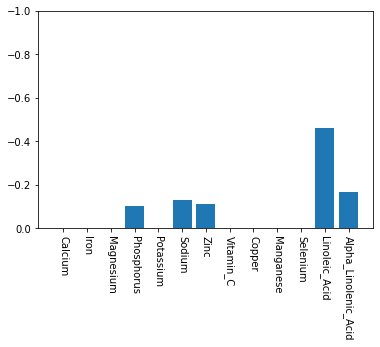

In [164]:
plt.bar(diff_ratio[cat_m].index, diff_ratio[cat_m].values)
plt.xticks(rotation=-90)
plt.ylim([0, -1])
plt.show()

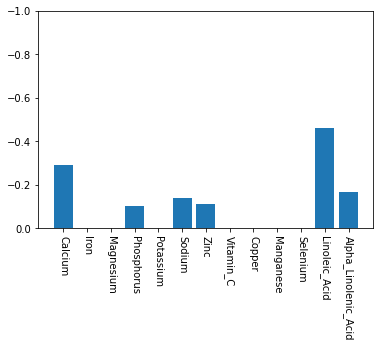

In [165]:
plt.bar(diff_ratio[cat_m].index, diff_ratio[cat_m].values-m_nutri_ratio[cat_m].loc['CAT-02554'].values)
plt.xticks(rotation=-90)
plt.ylim([0, -1])
plt.show()

In [95]:
m_ratio_top3

prod_cd
CAT-02554    37.666103
YUV-00171    37.744752
AOR-08333    38.123696
dtype: float64

In [99]:
m_nutri_ratio.loc['CAT-02554'][m_nutri_ratio.loc['CAT-02554']> 0].sort_values(ascending= False)

Calcium      1.028571
Vitamin_C    0.900000
Magnesium    0.189286
Sodium       0.006667
Name: CAT-02554, dtype: float64

In [100]:
m_nutri_ratio.loc['YUV-00171'][m_nutri_ratio.loc['YUV-00171']> 0].sort_values(ascending= False)

Vitamin_B12    0.833333
Iron           0.714286
Vitamin_C      0.400000
Sodium         0.004000
Name: YUV-00171, dtype: float64

In [101]:
m_nutri_ratio.loc['AOR-08333'][m_nutri_ratio.loc['AOR-08333']> 0].sort_values(ascending= False)

Vitamin_C    1.000000
Magnesium    0.357143
Name: AOR-08333, dtype: float64

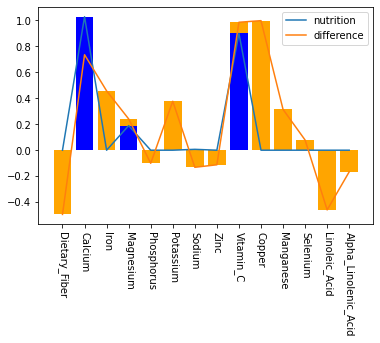

In [131]:
plt.plot(m_nutri_ratio[cat_m].loc['CAT-02554'])
plt.plot(diff_ratio[cat_m])

plt.bar(diff_ratio[cat_m].index, diff_ratio[cat_m].values, color= 'orange')
plt.bar(m_nutri_ratio[cat_m].loc['CAT-02554'].index, m_nutri_ratio[cat_m].loc['CAT-02554'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

In [108]:
m_similarity_top3['similarity']

prod_cd
CAT-02554    0.195664
YUV-00171    0.188840
NOW-01275    0.185511
Name: similarity, dtype: float64

In [110]:
m_nutri_ratio.loc['YUV-00171'][m_nutri_ratio.loc['YUV-00171']> 0].sort_values(ascending= False)

Vitamin_B12    0.833333
Iron           0.714286
Vitamin_C      0.400000
Sodium         0.004000
Name: YUV-00171, dtype: float64

In [109]:
m_nutri_ratio.loc['NOW-01275'][m_nutri_ratio.loc['NOW-01275']> 0].sort_values(ascending= False)

Vitamin_B12    8.333333
Vitamin_C      3.600000
Vitamin_B6     3.571429
Magnesium      1.785714
Calcium        1.428571
Name: NOW-01275, dtype: float64

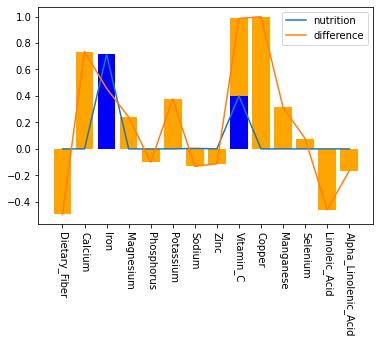

In [130]:
plt.plot(m_nutri_ratio[cat_m].loc['YUV-00171'])
plt.plot(diff_ratio[cat_m])

plt.bar(diff_ratio[cat_m].index, diff_ratio[cat_m].values, color= 'orange')
plt.bar(m_nutri_ratio[cat_m].loc['YUV-00171'].index, m_nutri_ratio[cat_m].loc['YUV-00171'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

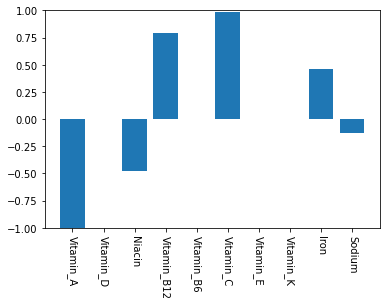

In [161]:
plt.bar(diff_ratio[cat_v].index, diff_ratio[cat_v].values)
plt.xticks(rotation=-90)
plt.ylim([-1, 1])
plt.show()

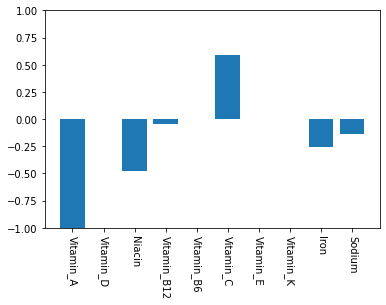

In [160]:
plt.bar(diff_ratio[cat_v].index, diff_ratio[cat_v].values-v_nutri_ratio[cat_v].loc['YUV-00171'].values)
plt.xticks(rotation=-90)
plt.ylim([-1, 1])
plt.show()

In [112]:
v_ratio_top3

prod_cd
YUV-00171    37.744752
SOR-04420    38.081956
SOR-04421    38.081956
dtype: float64

In [113]:
v_nutri_ratio.loc['YUV-00171'][v_nutri_ratio.loc['YUV-00171']> 0].sort_values(ascending= False)

Vitamin_B12    0.833333
Iron           0.714286
Vitamin_C      0.400000
Sodium         0.004000
Name: YUV-00171, dtype: float64

In [114]:
v_nutri_ratio.loc['SOR-04420'][v_nutri_ratio.loc['SOR-04420']> 0].sort_values(ascending= False)

Vitamin_C    0.950000
Magnesium    0.132143
Calcium      0.028571
Name: SOR-04420, dtype: float64

In [115]:
v_nutri_ratio.loc['SOR-04421'][v_nutri_ratio.loc['SOR-04421']> 0].sort_values(ascending= False)

Vitamin_C    0.950000
Magnesium    0.132143
Calcium      0.028571
Name: SOR-04421, dtype: float64

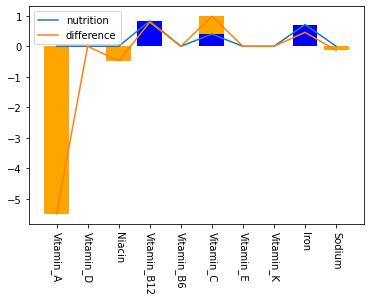

In [126]:
plt.plot(v_nutri_ratio[cat_v].loc['YUV-00171'])
plt.plot(diff_ratio[cat_v])

plt.bar(diff_ratio[cat_v].index, diff_ratio[cat_v].values, color= 'orange')
plt.bar(v_nutri_ratio[cat_v].loc['YUV-00171'].index, v_nutri_ratio[cat_v].loc['YUV-00171'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

In [119]:
v_similarity_top3['similarity']

prod_cd
ENR-00130    0.199947
ENR-00132    0.199947
YUV-00171    0.188840
Name: similarity, dtype: float64

In [120]:
v_nutri_ratio.loc['ENR-00130'][v_nutri_ratio.loc['ENR-00130']> 0].sort_values(ascending= False)

Vitamin_B12    10.416667
Vitamin_C      10.000000
Vitamin_B6      1.428571
Vitamin_E       0.837500
Zinc            0.625000
Magnesium       0.214286
Manganese       0.142857
Calcium         0.071429
Potassium       0.057143
Phosphorus      0.054286
Name: ENR-00130, dtype: float64

In [121]:
v_nutri_ratio.loc['ENR-00132'][v_nutri_ratio.loc['ENR-00132']> 0].sort_values(ascending= False)

Vitamin_B12    10.416667
Vitamin_C      10.000000
Vitamin_B6      1.428571
Vitamin_E       0.837500
Zinc            0.625000
Magnesium       0.214286
Manganese       0.142857
Calcium         0.071429
Potassium       0.057143
Phosphorus      0.054286
Name: ENR-00132, dtype: float64

In [122]:
v_nutri_ratio.loc['YUV-00171'][v_nutri_ratio.loc['YUV-00171']> 0].sort_values(ascending= False)

Vitamin_B12    0.833333
Iron           0.714286
Vitamin_C      0.400000
Sodium         0.004000
Name: YUV-00171, dtype: float64

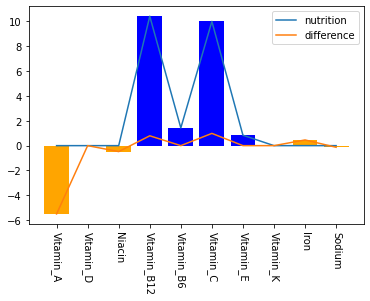

In [127]:
plt.plot(v_nutri_ratio[cat_v].loc['ENR-00130'])
plt.plot(diff_ratio[cat_v])

plt.bar(diff_ratio[cat_v].index, diff_ratio[cat_v].values, color= 'orange')
plt.bar(v_nutri_ratio[cat_v].loc['ENR-00130'].index, v_nutri_ratio[cat_v].loc['ENR-00130'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

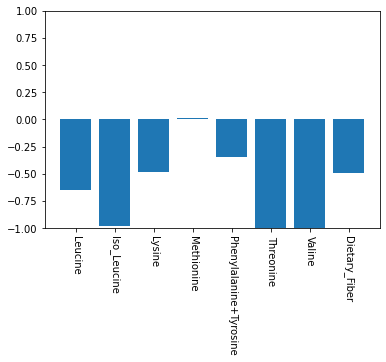

In [159]:
plt.bar(diff_ratio[cat_a].index, diff_ratio[cat_a].values)
plt.xticks(rotation=-90)
plt.ylim([-1, 1])
plt.show()

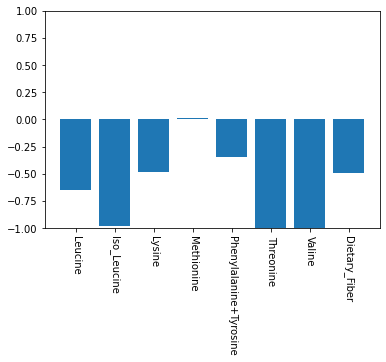

In [158]:
plt.bar(diff_ratio[cat_a].index, diff_ratio[cat_a].values-a_nutri_ratio[cat_a].loc['SNS-00190'].values)
plt.xticks(rotation=-90)
plt.ylim([-1, 1])
plt.show()

In [124]:
a_ratio_top3

prod_cd
SNS-00190    38.927300
SNS-00161    38.952435
SNS-00163    38.973050
dtype: float64

In [71]:
a_nutri_ratio.loc['SNS-00190'][a_nutri_ratio.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   0.162857
Phenylalanine+Tyrosine    0.000172
Name: SNS-00190, dtype: float64

In [72]:
a_nutri_ratio.loc['SNS-00161'][a_nutri_ratio.loc['SNS-00161']> 0].sort_values(ascending= False)

Calcium                   0.141429
Phenylalanine+Tyrosine    0.000345
Name: SNS-00161, dtype: float64

In [73]:
a_nutri_ratio.loc['SNS-00163'][a_nutri_ratio.loc['SNS-00163']> 0].sort_values(ascending= False)

Calcium                   0.124286
Phenylalanine+Tyrosine    0.000259
Name: SNS-00163, dtype: float64

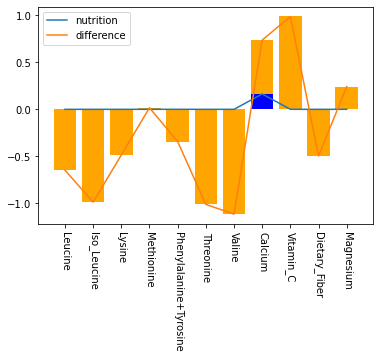

In [128]:
plt.plot(a_nutri_ratio[cat_a].loc['SNS-00190'])
plt.plot(diff_ratio[cat_a])

plt.bar(diff_ratio[cat_a].index, diff_ratio[cat_a].values, color= 'orange')
plt.bar(a_nutri_ratio[cat_a].loc['SNS-00190'].index, a_nutri_ratio[cat_a].loc['SNS-00190'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

In [125]:
a_similarity_top3['similarity']

prod_cd
SNS-00758    0.155501
SNS-00190    0.117562
SNS-00163    0.117506
Name: similarity, dtype: float64

In [79]:
a_nutri_ratio.loc['SNS-00758'][a_nutri_ratio.loc['SNS-00758']> 0].sort_values(ascending= False)

Vitamin_C        10.000000
Lysine            0.423077
Magnesium         0.164286
Calcium           0.094286
Dietary_Fiber     0.050000
Name: SNS-00758, dtype: float64

In [80]:
a_nutri_ratio.loc['SNS-00190'][a_nutri_ratio.loc['SNS-00190']> 0].sort_values(ascending= False)

Calcium                   0.162857
Phenylalanine+Tyrosine    0.000172
Name: SNS-00190, dtype: float64

In [81]:
a_nutri_ratio.loc['SNS-00163'][a_nutri_ratio.loc['SNS-00163']> 0].sort_values(ascending= False)

Calcium                   0.124286
Phenylalanine+Tyrosine    0.000259
Name: SNS-00163, dtype: float64

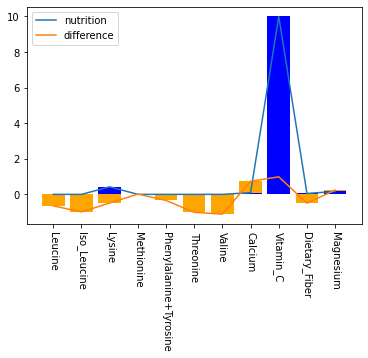

In [129]:
plt.plot(a_nutri_ratio[cat_a].loc['SNS-00758'])
plt.plot(diff_ratio[cat_a])

plt.bar(diff_ratio[cat_a].index, diff_ratio[cat_a].values, color= 'orange')
plt.bar(a_nutri_ratio[cat_a].loc['SNS-00758'].index, a_nutri_ratio[cat_a].loc['SNS-00758'].values, color= 'blue')

plt.legend(['nutrition', 'difference'])
plt.xticks(rotation=-90)
plt.show()

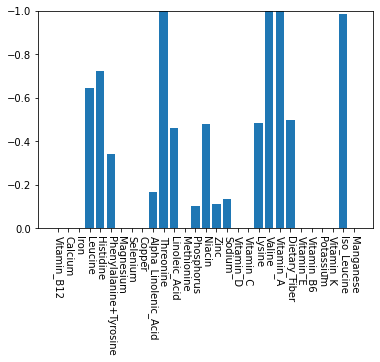

In [166]:
plt.bar(diff_ratio.index, diff_ratio.values)
plt.xticks(rotation=-90)
plt.ylim([0, -1])
plt.show()

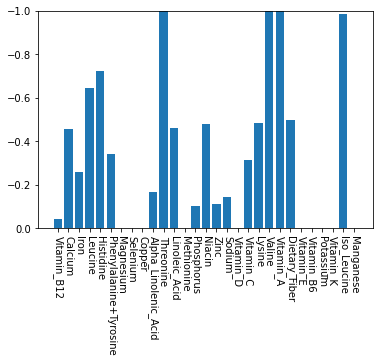

In [167]:
plt.bar(diff_ratio.index, diff_ratio.values-a_nutri_ratio.loc['SNS-00190'].values\
-v_nutri_ratio.loc['YUV-00171'].values-m_nutri_ratio.loc['CAT-02554'].values)
plt.xticks(rotation=-90)
plt.ylim([0, -1])
plt.show()

In [196]:
sr_rdi= pd.Series(user_rdi,
            dtype= float).drop(['Calories', 'Folic_acid', 'Carbohydrate', 'Protein', 'Fat'])

In [195]:
sr_intake= pd.Series(user_intake,
            dtype= float).drop(['Calories', 'Folic_acid', 'Carbohydrate', 'Protein', 'Fat', 'Cholesterol'])

In [197]:
x= sr_intake/sr_rdi

In [198]:
x.fillna(0, inplace= True)

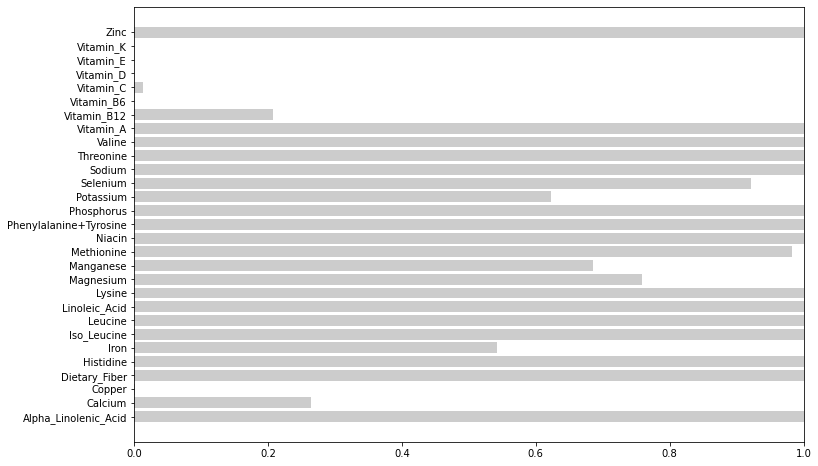

In [291]:
plt.figure(figsize= (12, 8))
plt.barh(x.index, x.values, color= '#CCCCCC')
#plt.xticks(rotation=-90)
plt.xlim([0, 1])
plt.show()



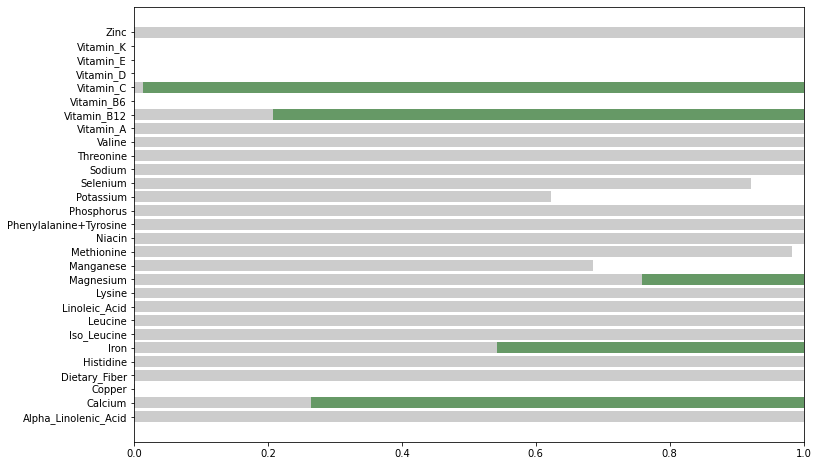

In [285]:
# Best
plt.figure(figsize= (12, 8))
plt.barh(x.index, x.values+a_nutri_ratio[cols].loc['SNS-00758'].values+\
v_nutri_ratio[cols].loc['YUV-00171'].values+m_nutri_ratio[cols].loc['CAT-02554'].values, color= '#669966')
plt.barh(x.index, x.values, color= '#CCCCCC')

#plt.xticks(rotation=-90)
plt.xlim([0, 1])
plt.show()

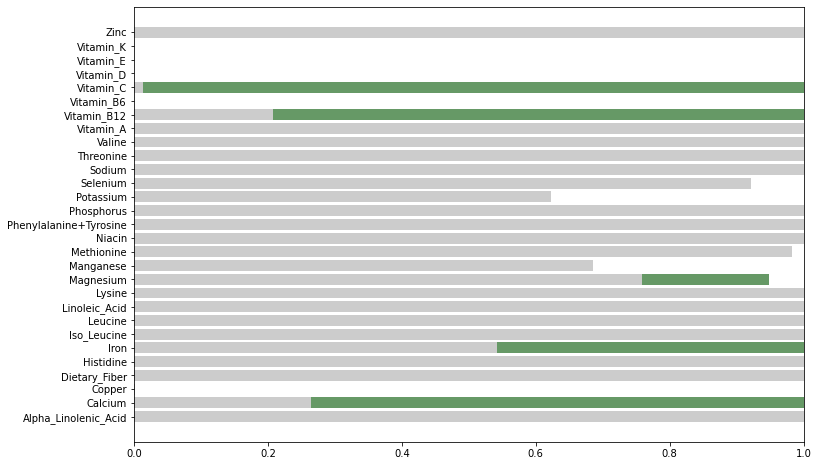

In [278]:
# SSE
plt.figure(figsize= (12, 8))
plt.barh(x.index, x.values+a_nutri_ratio[cols].loc['SNS-00190'].values+\
v_nutri_ratio[cols].loc['YUV-00171'].values+m_nutri_ratio[cols].loc['CAT-02554'].values, color= '#669966')
plt.barh(x.index, x.values, color= '#CCCCCC')

#plt.xticks(rotation=-90)
plt.xlim([0, 1])
plt.show()

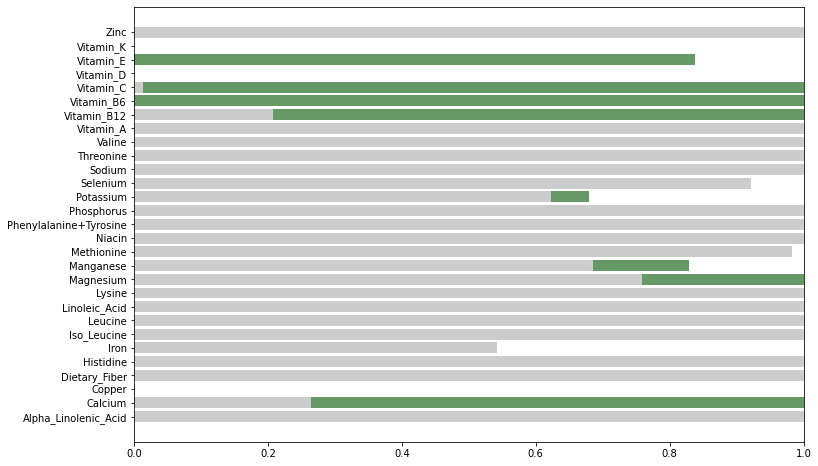

In [290]:
# Cosine Similarity
plt.figure(figsize= (12, 8))
plt.barh(x.index, x.values+a_nutri_ratio[cols].loc['SNS-00758'].values+\
v_nutri_ratio[cols].loc['ENR-00130'].values+m_nutri_ratio[cols].loc['CAT-02554'].values, color= '#669966')
plt.barh(x.index, x.values, color= '#CCCCCC')

#plt.xticks(rotation=-45)
plt.xlim([0, 1])
plt.show()

In [202]:
#sorted(a_nutri_ratio.columns.tolist())

In [217]:
cols= x.index.tolist()

In [212]:
v_nutri_ratio.loc['YUV-00171'][v_nutri_ratio.loc['YUV-00171']>0]

Vitamin_B12    0.833333
Iron           0.714286
Sodium         0.004000
Vitamin_C      0.400000
Name: YUV-00171, dtype: float64

In [213]:
v_nutri.loc['YUV-00171'][v_nutri_ratio.loc['YUV-00171']>0]

Vitamin_B12     2.0
Iron           10.0
Sodium          6.0
Vitamin_C      40.0
Name: YUV-00171, dtype: float64

In [214]:
v_nutri_ratio.loc['YUV-00171'].values

array([0.83333333, 0.        , 0.71428571, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.004     , 0.        , 0.4       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])